# Subsurface Salinity Time-Series Analysis

Info: The Hadley EN4 subsurface salinity dataset reports salinity values in Practical Salinity Units (PSU). PSU is a unitless quantity defined by the ratio of the electrical conductivity of seawater to that of a standard potassium chloride solution.

Insight: Salinity can affect chl-a and NPP through its influence on water density, nutrient availability, and light penetration in the water column. In general, higher salinity waters tend to be denser than lower salinity waters. As a result, in areas where freshwater mixes with seawater, such as estuaries, there can be a stratification of water layers with different salinities. This can impact chl-a and NPP because it affects the mixing of nutrients and light in the water column. For example, in areas where there is a strong halocline, the layer of water with lower salinity can be nutrient-rich but light-limited, while the layer with higher salinity can be light-rich but nutrient-limited. This can impact the growth of phytoplankton, which is a key driver of chl-a and NPP.

Additionally, salinity can influence the availability of nutrients in the water. For example, some phytoplankton species have specific requirements for certain ions that are more abundant in higher salinity waters. Changes in salinity can therefore impact the composition of the phytoplankton community and the overall productivity of the ecosystem. Finally, changes in salinity can impact the physical structure of the water column, which can in turn affect light penetration. For example, changes in the density of the water column can influence the depth of the mixed layer, which can impact the amount of light available for photosynthesis. This can also affect the depth distribution of different phytoplankton species, which can in turn impact the overall chl-a and NPP of the ecosystem.

In [12]:
import pandas as pd

#### Reading & Cleaning datasets

In [13]:
# Creating a dictionary for all geo-points with their salinity data
geopoint = {'0': pd.read_csv('../Nauplius data (raw)/point 0/dataPSAL_HEN4-z0005.csv'),
            'A': pd.read_csv('../Nauplius data (raw)/point A/dataPSAL_HEN4-z0005.csv'),
            'B': pd.read_csv('../Nauplius data (raw)/point B/dataPSAL_HEN4-z0005.csv')
           }
# Cleaning all datasets
for key in geopoint:
    df = geopoint[key]
    # Dropping empty unnamed NaN col
    df.drop(columns=df.columns[-1], inplace=True)
    # Renaming the salinity col
    df.rename(columns={'PSAL= Hadley-EN4 Salinity () at 5 m': 'Salinity'}, inplace=True)
    # Filter the rows for the year 2001 onwards
    df['DATE-YMD'] = pd.to_datetime(df['DATE-YMD'])
    df = df[df['DATE-YMD'] >= '2001-01-01']
    # Update the original dataframe in the dictionary
    geopoint[key] = df

# Display 2 random datasets
display(geopoint['A'], geopoint['B'])

,DATE-YMD,Salinity
612,2001-01-15,36.029
613,2001-02-15,35.998
614,2001-03-15,35.947
615,2001-04-15,35.950
616,2001-05-15,35.941
...,...,...
859,2021-08-15,36.122
860,2021-09-15,36.181
861,2021-10-15,36.216
862,2021-11-15,36.142


,DATE-YMD,Salinity
612,2001-01-15,35.982
613,2001-02-15,35.950
614,2001-03-15,35.895
615,2001-04-15,35.900
616,2001-05-15,35.891
...,...,...
859,2021-08-15,36.113
860,2021-09-15,36.155
861,2021-10-15,36.173
862,2021-11-15,36.095


#### Comparison of salinity of all geopoints 

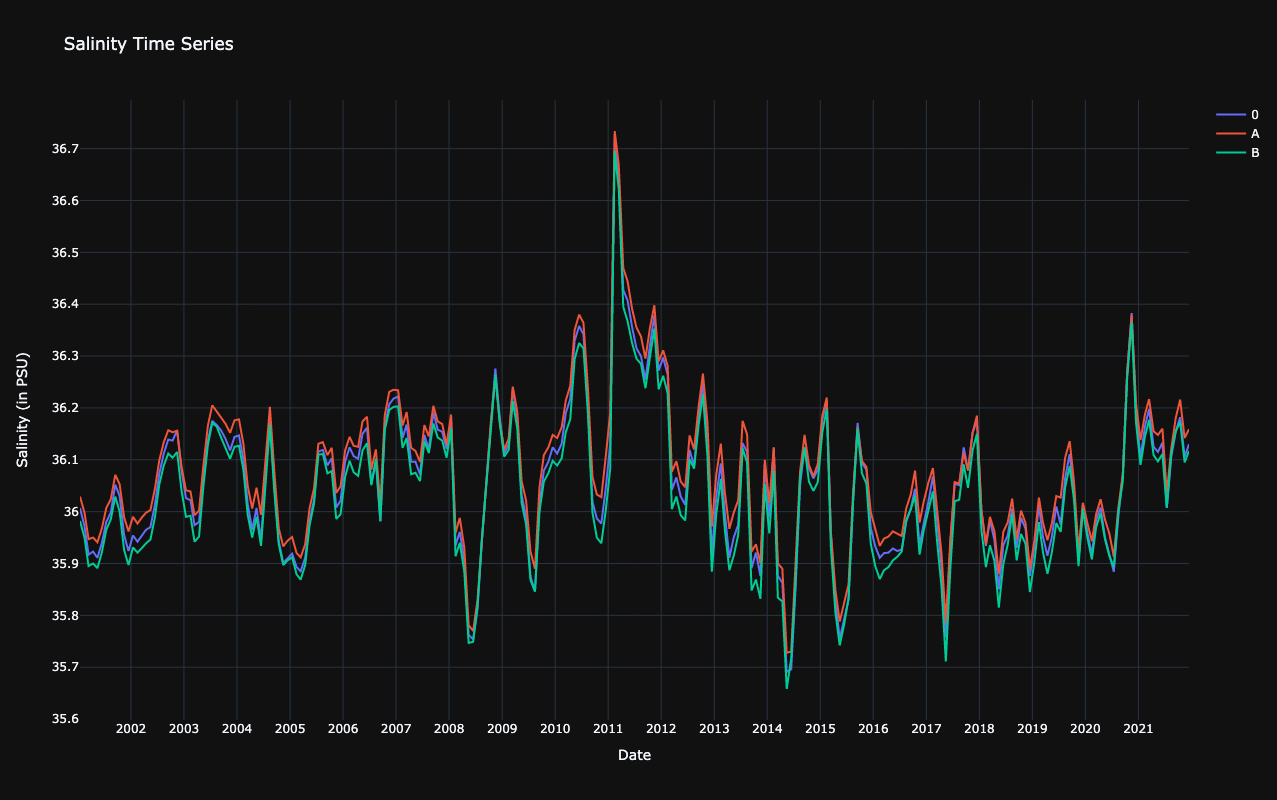

In [16]:
import plotly.graph_objs as go
import math

# Create empty traces list and loop through each geopoint
traces = []
for point in geopoint:
    # access dataframe
    df = geopoint[point]
    # create trace for each dataset
    trace = go.Scatter(x=df['DATE-YMD'], y=df['Salinity'], mode='lines', name=point)
    # append trace to traces list
    traces.append(trace)

# create layout for the plot
layout = go.Layout(title=f'Salinity Time Series',
                   xaxis=dict(title='Date', dtick='M12'),
                   yaxis=dict(title='Salinity (in PSU)', dtick=0.1),
                   height = 800, width=1200,
                   template='plotly_dark')
# create figure object and plot the traces
fig = go.Figure(data=traces, layout=layout)
fig.show()